In [1]:
import pandas as pd

ua_full_path = '{}/{}'.format(base_path,'3_HistogramModelTypes/part-00000-4d54dff9-636a-4c26-9d9e-96a17e0a4af2-c000.csv')
ap_full_path = '{}/{}'.format(base_path,'AcceptedCases/3_HistogramModelTypes/positive_feed_models/part-00000-29c92456-d731-42f2-ba7e-68950d072296-c000.csv')
an_full_path='{}/{}'.format(base_path,'AcceptedCases/3_HistogramModelTypes/negative_feed_models/part-00000-fe21af48-b540-4e13-8e1a-2daff3d38aa3-c000.csv')



In [2]:
ua_model_df= pd.read_csv(ua_full_path)
ua_model_df.head()

,model,os_version
0,SO-01L,9
1,SO-01L,9
2,SH-03K,9
3,SO-04K,9
4,SO-03K,9


In [3]:
ap_model_df =pd.read_csv(ap_full_path)
ap_model_df.head()

,model,os_version
0,SH-01L,8.1.0
1,SH-01L,8.1.0
2,SH-03K,9
3,SH-01L,8.1.0
4,SH-01L,8.1.0


In [4]:
an_model_df =pd.read_csv(an_full_path)
an_model_df.head()

,model,os_version
0,SC-02L,8.1.0
1,SH-01L,8.1.0
2,SH-01L,8.1.0
3,SH-03K,9
4,SC-02L,8.1.0


In [73]:
ua_model_count_df = ua_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='ua_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
ua_model_count_df.head()

,model,ua_model_count
0,SO-01L,1373271
1,SH-03K,1086186
2,SO-01K,638738
3,SH-01L,630671
4,SC-01L,394380


In [74]:
ap_model_count_df = ap_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='ap_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
ap_model_count_df.head()

,model,ap_model_count
0,SH-01L,956
1,SO-01L,762
2,SH-03K,680
3,SO-01K,556
4,SC-02L,409


In [75]:
an_model_count_df = an_model_df.groupby(['model'])\
                                .size()\
                                .sort_values(ascending=False)\
                                .reset_index(name='an_model_count')

#model_count_df['model_os_version'] = model_count_df[['model','os_version']].apply(lambda x: '_'.join(x), axis=1) 
an_model_count_df.head()

,model,an_model_count
0,SH-01L,453
1,SH-03K,336
2,SO-01L,323
3,SC-02L,251
4,SO-01K,238


In [76]:
result_df = pd.merge(ua_model_count_df,ap_model_count_df, on='model', how='inner')
result_df = pd.merge(result_df,an_model_count_df, on='model', how='inner')
result_df

,model,ua_model_count,ap_model_count,an_model_count
0,SO-01L,1373271,762,323
1,SH-03K,1086186,680,336
2,SO-01K,638738,556,238
3,SH-01L,630671,956,453
4,SC-01L,394380,181,81
5,SC-02L,327575,409,251
6,SO-02K,250218,278,134
7,SO-03K,247188,269,92
8,SO-05K,166719,212,84
9,SO-04K,119914,97,41


In [77]:
result_df['sum'] = result_df[['ua_model_count','ap_model_count','an_model_count']].sum(axis=1)
#result_df.head()
result_df.head(20)

,model,ua_model_count,ap_model_count,an_model_count,sum
0,SO-01L,1373271,762,323,1374356
1,SH-03K,1086186,680,336,1087202
2,SO-01K,638738,556,238,639532
3,SH-01L,630671,956,453,632080
4,SC-01L,394380,181,81,394642
5,SC-02L,327575,409,251,328235
6,SO-02K,250218,278,134,250630
7,SO-03K,247188,269,92,247549
8,SO-05K,166719,212,84,167015
9,SO-04K,119914,97,41,120052


In [78]:
result_df['ua_perc']= round(result_df['ua_model_count']/result_df['sum'] * 100,4)
result_df['ap_perc']= round(result_df['ap_model_count']/result_df['sum'] * 100,4)
result_df['an_perc']= round(result_df['an_model_count']/result_df['sum'] * 100,4)
result_df= result_df[['model','ua_perc','ap_perc','an_perc']]
result_df=result_df.sort_values('ap_perc',ascending=False).reset_index()
result_df.head(15)

,index,model,ua_perc,ap_perc,an_perc
0,12,HW-01K,76.4706,11.7647,11.7647
1,10,HW-02L,90.4762,7.9365,1.5873
2,11,SO-03L,94.2857,2.8571,2.8571
3,3,SH-01L,99.7771,0.1512,0.0717
4,8,SO-05K,99.8228,0.1269,0.0503
5,5,SC-02L,99.7989,0.1246,0.0765
6,6,SO-02K,99.8356,0.1109,0.0535
7,7,SO-03K,99.8542,0.1087,0.0372
8,2,SO-01K,99.8758,0.0869,0.0372
9,9,SO-04K,99.8850,0.0808,0.0342


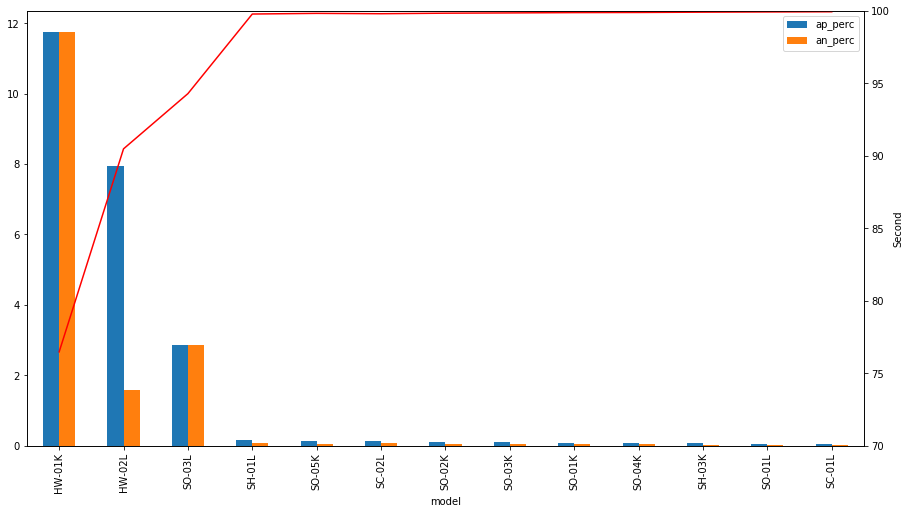

In [62]:
from numpy import array
from matplotlib import pyplot as plt
import numpy as np

ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="model", y=['ap_perc','an_perc'], kind="bar",ax=ax1,figsize=(15,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
ax2.set_ylabel('Second')
ax2.set_ylim((70.0,100.0))
plt.show()

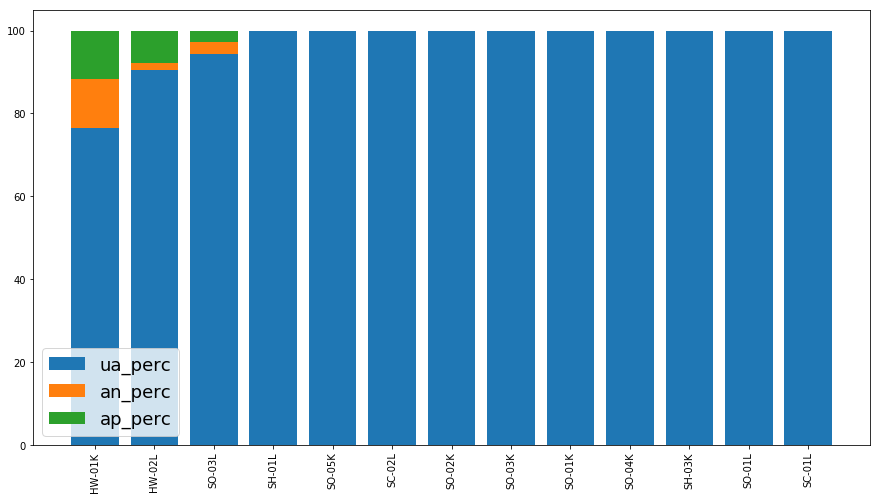

In [80]:
result_df = result_df[['model','ua_perc','an_perc','ap_perc']]
cumval=0
fig = plt.figure(figsize=(15,8))
for col in result_df.columns[~result_df.columns.isin(['model'])]:
    plt.bar(result_df.model, result_df[col], bottom=cumval, label=col)
    cumval = cumval+result_df[col]

_ = plt.xticks(rotation=90)
_ = plt.legend(fontsize=18)